In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import pickle

In [18]:
test_path = Path("../data/emnist-byclass-test.csv")
class_mapping_path = Path("class_mapping.pkl")

In [19]:
test = pd.read_csv(test_path, header=None, dtype=np.uint8).values

with open(class_mapping_path, "rb") as f:
    class_mapping = pickle.load(f)

In [28]:
sample = np.array([])
for entry in test:
    if class_mapping[entry[0]] == 'A':
        sample = entry[1:].reshape(28, 28)
        break

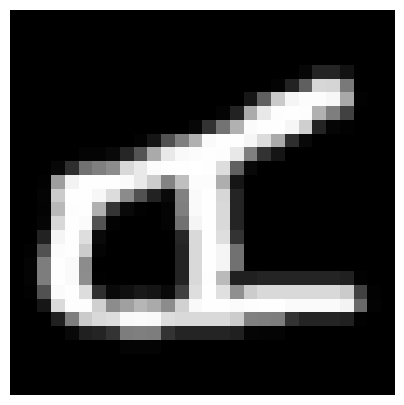

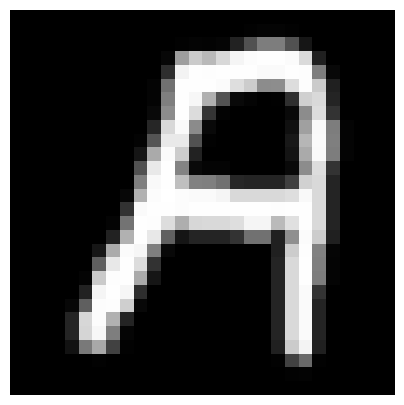

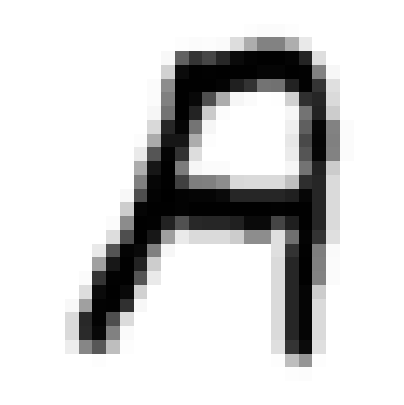

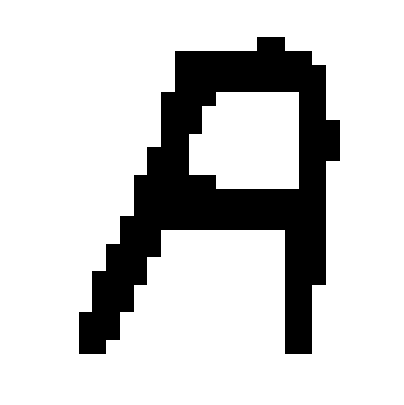

In [38]:
# Visualizar el proceso de preprocesamiento paso a paso para una muestra
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

# Asegurarse de que 'sample' está definido como una imagen 28x28 en escala de grises [0,255]
assert isinstance(sample, np.ndarray) and sample.shape == (28, 28), "'sample' debe ser una imagen 28x28"

# --------------------------------------------------
# 1) Original (EMNIST crudo) — mostrar SIN bordes ni índices
# --------------------------------------------------

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.imshow(sample, cmap='gray', vmin=0, vmax=255, interpolation='nearest')
ax1.set_axis_off()
# quitar marco y fondo para que la imagen exportada sea limpia
ax1.set_frame_on(False)
fig1.patch.set_visible(False)
fig1.savefig("images/original.png", dpi=150, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

# --------------------------------------------------
# 2) Orientación oficial EMNIST (flip + rot90)
# --------------------------------------------------
step_oriented = np.rot90(np.flip(sample, axis=1), k=1)
fig2, ax2 = plt.subplots(figsize=(5, 5))
ax2.imshow(step_oriented, cmap='gray', vmin=0, vmax=255, interpolation='nearest')
ax2.set_axis_off()
ax2.set_frame_on(False)
fig2.patch.set_visible(False)
fig2.savefig("images/oriented.png", dpi=150, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

# --------------------------------------------------
# 3) Invertir polaridad (fondo negro, letra blanca)
# --------------------------------------------------
step_inverted = 255 - step_oriented
fig3, ax3 = plt.subplots(figsize=(5, 5))
ax3.imshow(step_inverted, cmap='gray', vmin=0, vmax=255, interpolation='nearest')
ax3.set_axis_off()
ax3.set_frame_on(False)
fig3.patch.set_visible(False)
fig3.savefig("images/inverted.png", dpi=150, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()

# --------------------------------------------------
# 4) Binarización con umbral Otsu
# --------------------------------------------------
step_norm = step_inverted.astype(np.float32) / 255.0
thr = threshold_otsu(step_norm)
step_bin = (step_norm >= thr).astype(np.uint8)
fig4, ax4 = plt.subplots(figsize=(5, 5))
ax4.imshow(step_bin, cmap='gray', vmin=0, vmax=1, interpolation='nearest')
ax4.set_axis_off()
ax4.set_frame_on(False)
fig4.patch.set_visible(False)
fig4.savefig("images/binarized.png", dpi=150, bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()